In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.animation as animation
from IPython.core.display import HTML

In [ ]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset (2).csv')

In [ ]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print('Number of unique values: ', df[col].nunique())
    print('-------------------')

age
[75. 55. 65. 50. 90.]
Number of unique values:  47
-------------------
anaemia
[0 1]
Number of unique values:  2
-------------------
creatinine_phosphokinase
[ 582 7861  146  111  160]
Number of unique values:  208
-------------------
diabetes
[0 1]
Number of unique values:  2
-------------------
ejection_fraction
[20 38 40 15 60]
Number of unique values:  17
-------------------
high_blood_pressure
[1 0]
Number of unique values:  2
-------------------
platelets
[265000.   263358.03 162000.   210000.   327000.  ]
Number of unique values:  176
-------------------
serum_creatinine
[1.9 1.1 1.3 2.7 2.1]
Number of unique values:  40
-------------------
serum_sodium
[130 136 129 137 116]
Number of unique values:  27
-------------------
sex
[1 0]
Number of unique values:  2
-------------------
smoking
[0 1]
Number of unique values:  2
-------------------
time
[ 4  6  7  8 10]
Number of unique values:  148
-------------------
DEATH_EVENT
[1 0]
Number of unique values:  2
------------------

In [ ]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

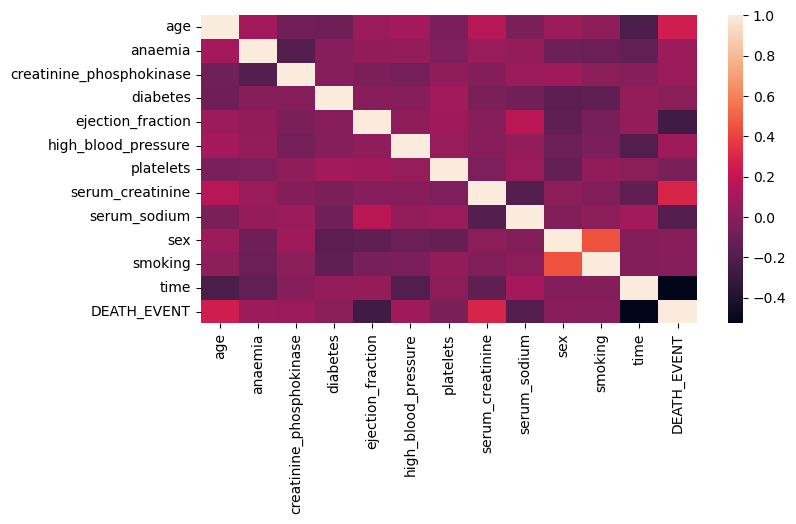

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=False)
plt.show()

In [ ]:
# PALETTE

from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(matplotlib.colors.to_rgb(c1))
    c2=np.array(matplotlib.colors.to_rgb(c2))
    return matplotlib.colors.to_hex((1-mix)*c1 + mix*c2)

meshPalette = []
meshPalette_rev = []
nCol = 50

for i in range(nCol):
    meshPalette.append(colorFader("#71706E", "#990303", i/nCol))
    meshPalette_rev.append(colorFader("#990303","#9C9999", i/nCol))

cm = LinearSegmentedColormap.from_list("cmap_name", meshPalette, N=nCol)
cm_rev = LinearSegmentedColormap.from_list("cmap_name", meshPalette_rev, N=nCol)

#sns.palplot(meshPalette)
#sns.palplot(["#990303", "#9C9999", "#71706E", "#292323", "#FFFFFF"]);

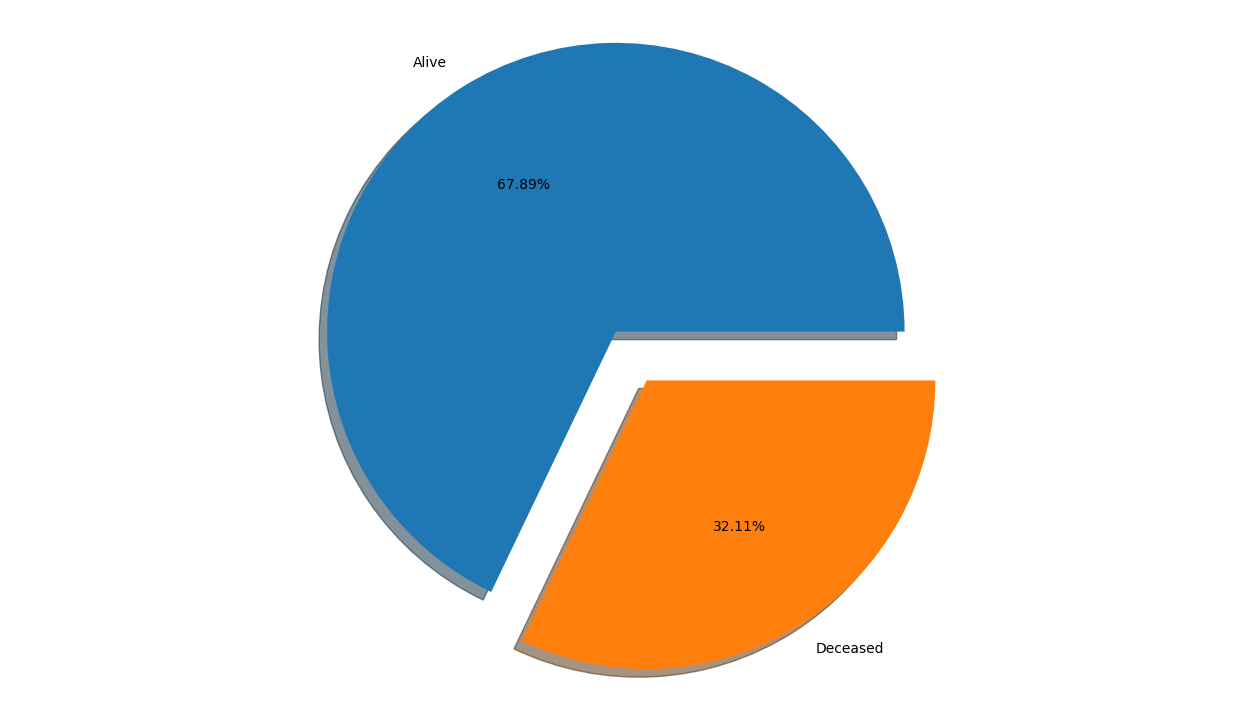

In [ ]:
# plot pie chart
plt.figure(figsize=(16,9))
explode = (0.2, 0)  # only "explode" the 1st slice.
labels = ["Alive", "Deceased"]
sizes = df["DEATH_EVENT"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, explode=explode)
plt.axis('equal')
plt.show()

In [ ]:
def CountPlot_Table (feature):
    # Create Count Plot for Churn Vs Feature
    sns.countplot(x=feature, hue="DEATH_EVENT", data=df, palette="Paired", edgecolor = 'Black', order=df[feature].value_counts().index)
    sns.despine()
    # Create a plot for proportions
    temp_table = pd.DataFrame(round(df.groupby(feature)['DEATH_EVENT'].value_counts(normalize = True),4))
    table = plt.table(cellText=temp_table.values,
          rowLabels=temp_table.index,
          colLabels=temp_table.columns,
          bbox=(1.5, 0,0.4 , 0.45))
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    plt.show()

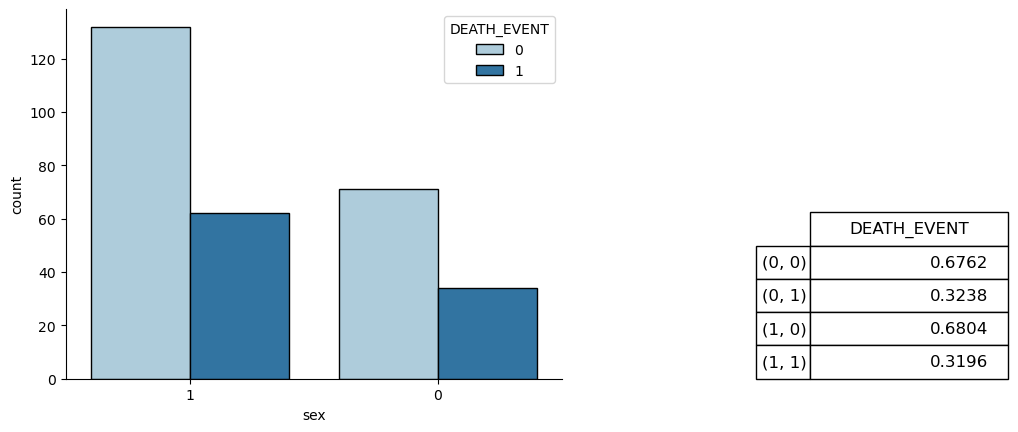

In [ ]:
#DEMOGRAPHIC DEPENDENCE ON Death_Event
demo_features = ['sex']
for feature in demo_features:
    CountPlot_Table(feature)

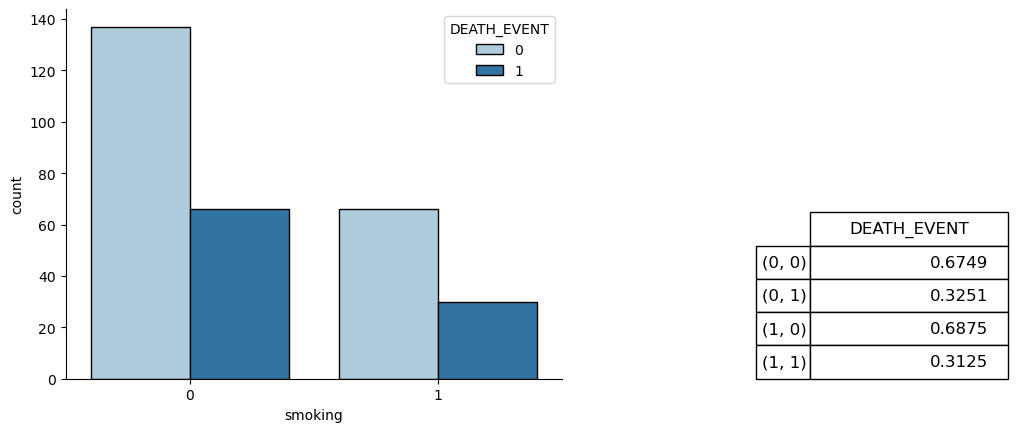

In [ ]:
#DEMOGRAPHIC DEPENDENCE ON Death_Event
demo_features = ['smoking']
for feature in demo_features:
    CountPlot_Table(feature)

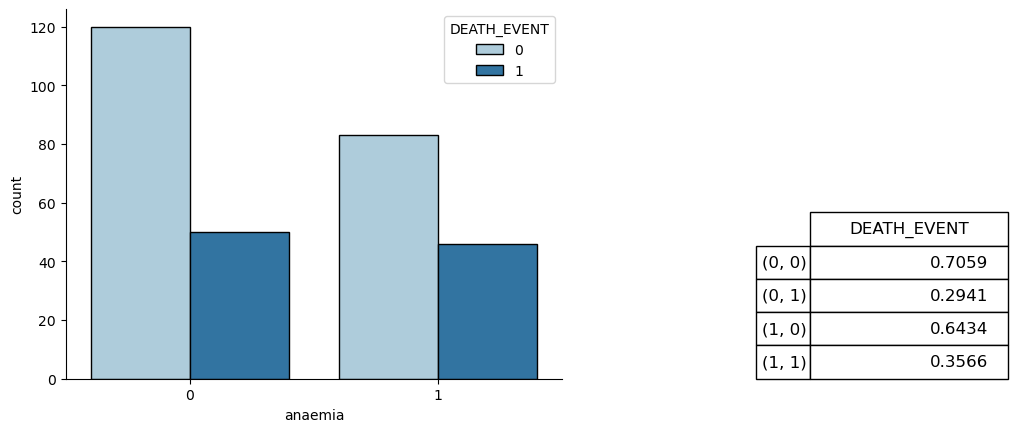

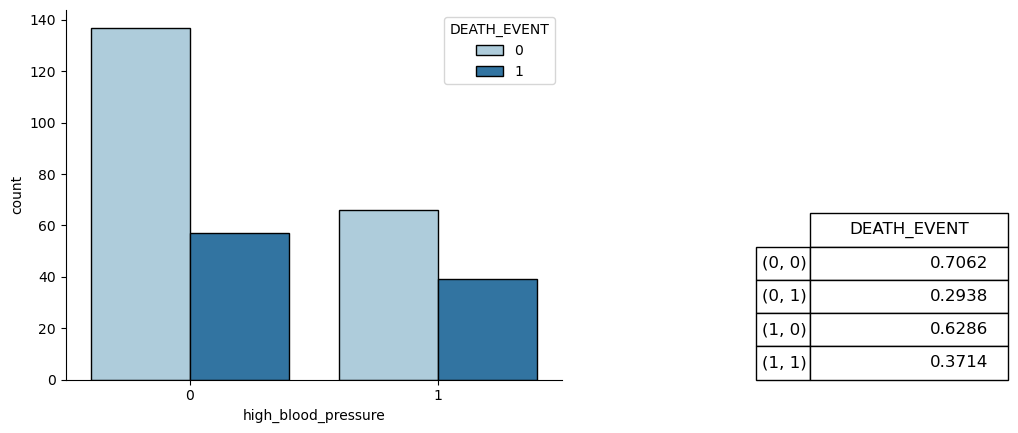

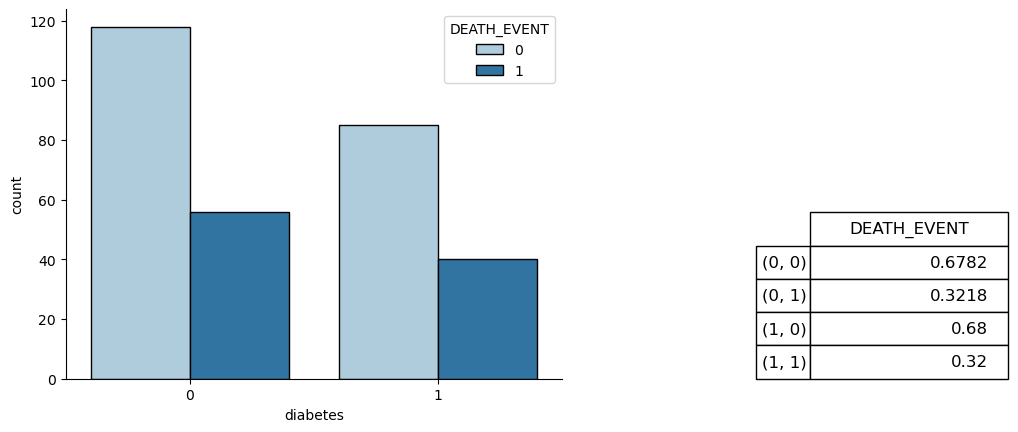

In [ ]:
#Prior Health COndition DEPENDENCE ON Death_Event
demo_features = ['anaemia','high_blood_pressure','diabetes']
for feature in demo_features:
    CountPlot_Table(feature)

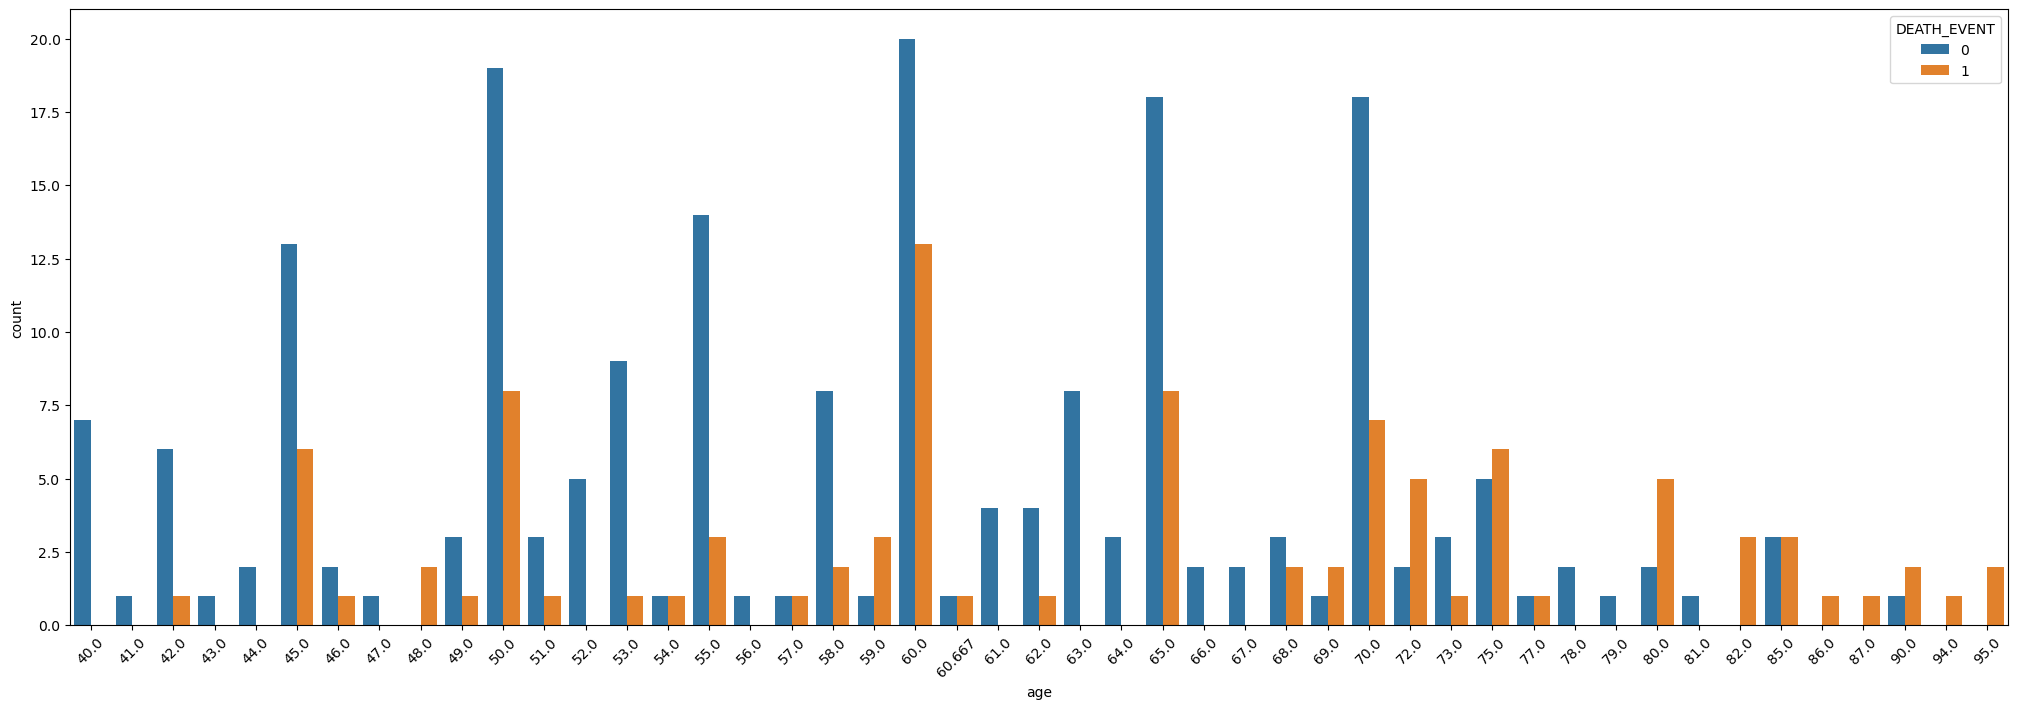

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(x=df['age'],data=df, hue ="DEATH_EVENT")
plt.xticks(rotation=45)
plt.show()

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\sande\anaconda3\lib\site-packag

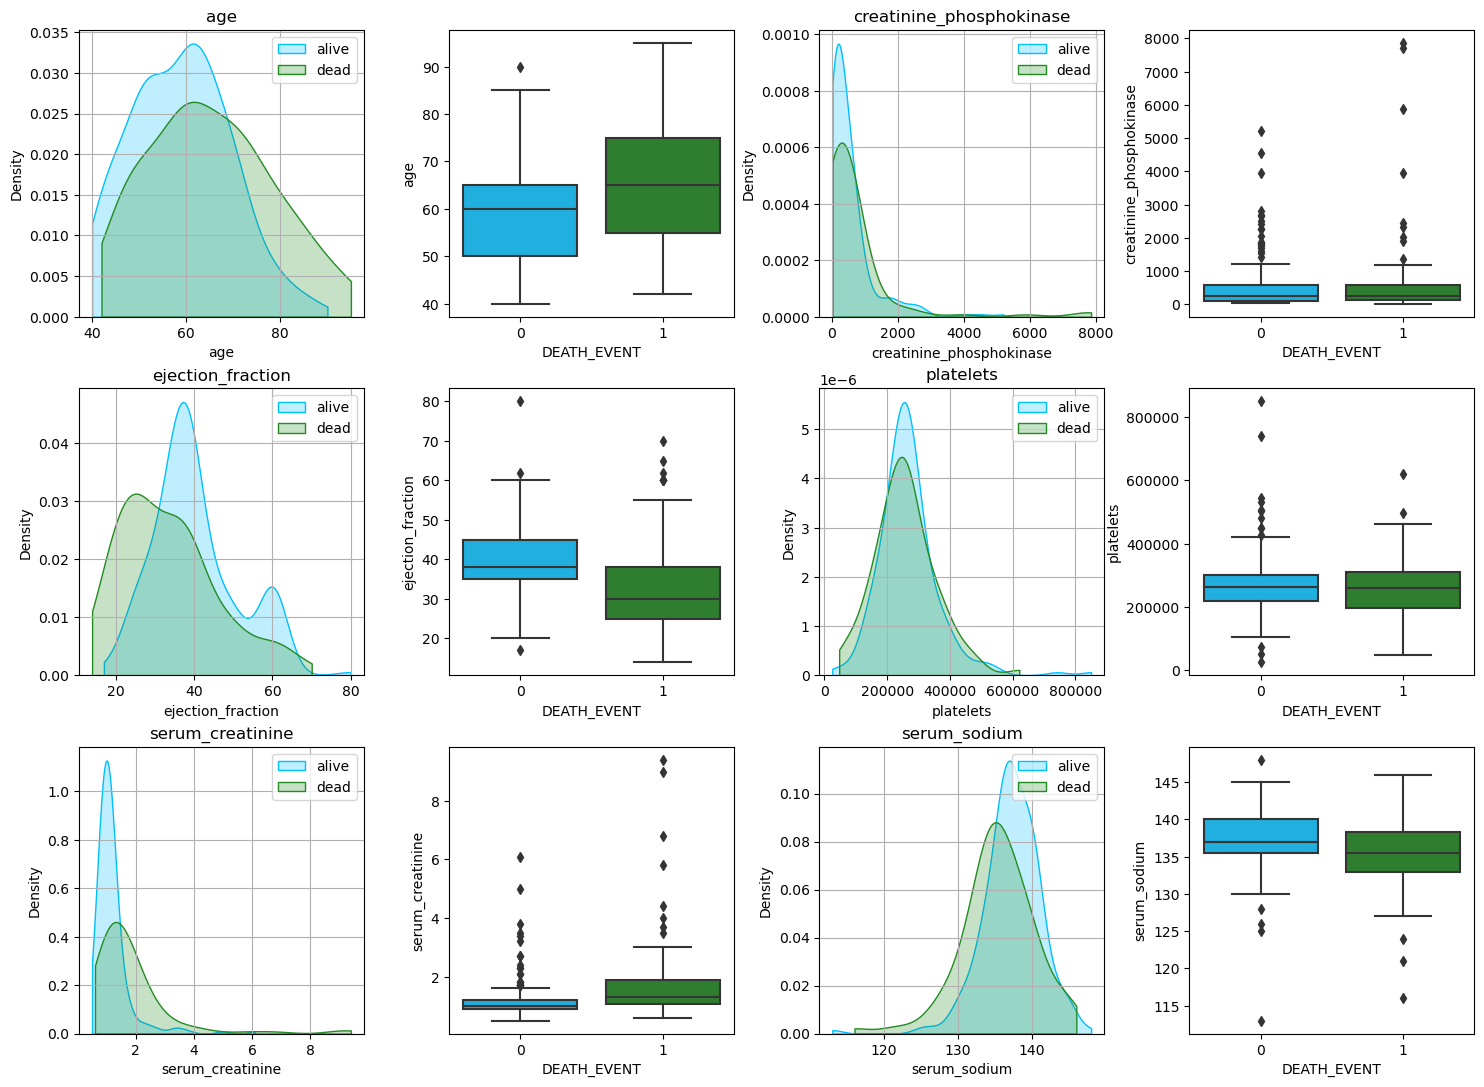

In [ ]:
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace=.25, wspace=.3)

    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df.loc[df["DEATH_EVENT"]==0, col], label="alive", color = "#00BFFF", shade=True, kernel='gau', cut=0)
    sns.kdeplot(df.loc[df["DEATH_EVENT"]==1, col], label="dead",  color = "#228B22", shade=True, kernel='gau', cut=0)
    plt.legend()

    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y=col, data=df, x="DEATH_EVENT", palette=["#00BFFF", "#228B22"])


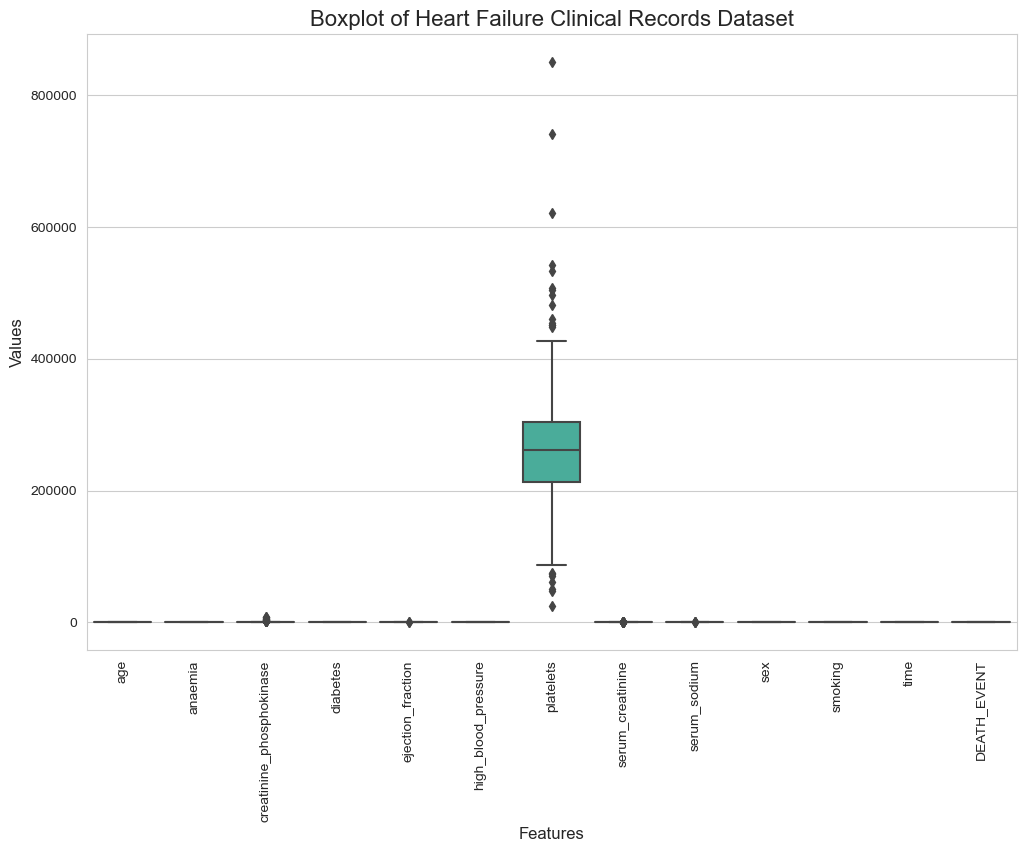

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(data=df, orient='v', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Boxplot of Heart Failure Clinical Records Dataset', fontsize=16)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Values', fontsize=12)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(239, 12)

In [ ]:
y_train.shape

(239,)

In [ ]:
X_test.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
281  70.0        0                       582         0                 40   
265  50.0        1                       298         0                 35   
164  45.0        0                      2442         1                 30   
9    80.0        1                       123         0                 35   
77   42.0        0                       102         1                 40   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
281                    0    51000.0               2.7           136    1   
265                    0   362000.0               0.9           140    1   
164                    0   334000.0               1.1           139    1   
9                      1   388000.0               9.4           133    1   
77                     0   237000.0               1.2           140    1   

     smoking  time  
281        1   250  
265        1   240  
164        0   129  
9          1    10  
77         0    74

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import svm,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import math
%matplotlib inline

Feature 0 : 21.658
Feature 1 : 0.782
Feature 2 : 0.295
Feature 3 : 0.003
Feature 4 : 16.802
Feature 5 : 0.812
Feature 6 : 0.818
Feature 7 : 28.283
Feature 8 : 8.829
Feature 9 : 0.657
Feature 10 : 0.481
Feature 11 : 97.254



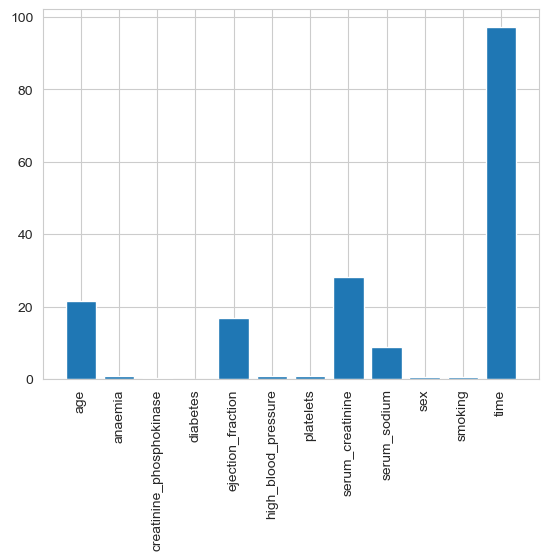

In [ ]:
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
Kbest_classif = SelectKBest(score_func=f_classif, k=6)
Kbest_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
# Initialize default models
default_lr = LogisticRegression()
default_dt = DecisionTreeClassifier()
default_rf = RandomForestClassifier()
default_xgb = xgb.XGBClassifier()

In [ ]:
# Train and evaluate default models
for model_name, model in zip(['LR', 'DT', 'RF', 'XGB'], [default_lr, default_dt, default_rf, default_xgb]):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"{model_name} - Default Model")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba)}")
    print()

LR - Default Model
Accuracy: 0.8
AUC-ROC: 0.8342857142857143

DT - Default Model
Accuracy: 0.6333333333333333
AUC-ROC: 0.6057142857142856

RF - Default Model
Accuracy: 0.7833333333333333
AUC-ROC: 0.848

XGB - Default Model
Accuracy: 0.7333333333333333
AUC-ROC: 0.8697142857142857



The best estimator is :  RandomForestClassifier(max_depth=4, n_estimators=75)

Accuracy with best estimator :  0.7333333333333333

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.85      0.44      0.58        25

    accuracy                           0.73        60
   macro avg       0.77      0.69      0.69        60
weighted avg       0.76      0.73      0.71        60



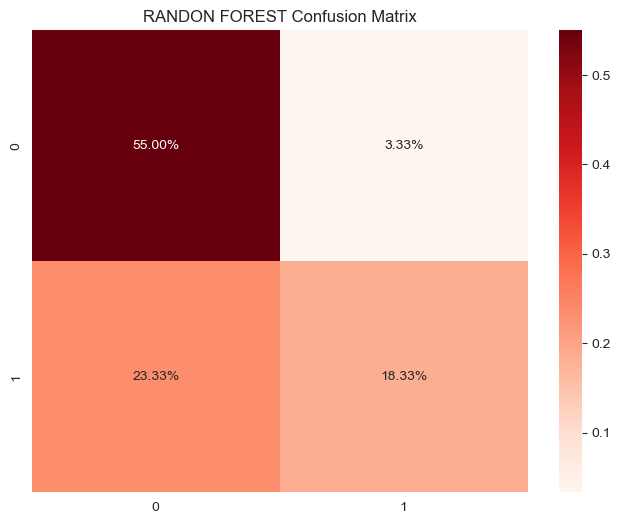

AUC-ROC: 0.8194285714285714


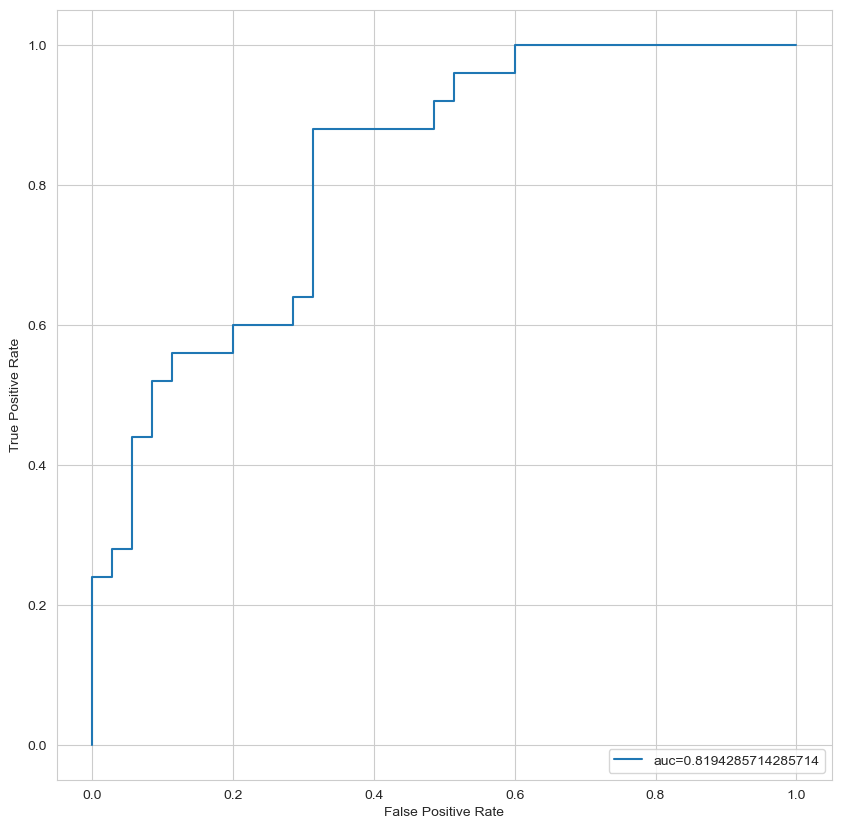


The average cross-validation score is 0.8157575757575757


In [ ]:
#model tuning
param_grid = [
  {'n_estimators': [10,25,50,75,100],'max_depth': [None,2,4,6,8,10,12]}
    ]
model_rf = RandomForestClassifier()
model_gs = GridSearchCV(model_rf,param_grid,cv=10,n_jobs=-1)
model_gs.fit(X_train,y_train)
print("The best estimator is : ",model_gs.best_estimator_)

#Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_cv))
rf = round(accuracy_score(y_test, pred_cv)*100,2)
rf_1= round(recall_score(y_test, pred_cv)*100,2)
print("\nRandom Forest Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))

#Confusion Matrix
cm1 = confusion_matrix(y_test, pred_cv)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("RANDON FOREST Confusion Matrix",fontsize=12)
plt.show()
plt.show()

#ROC curve
probs = model_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc}")
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

The best estimator is :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy with best estimator :  0.75

XGBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63   

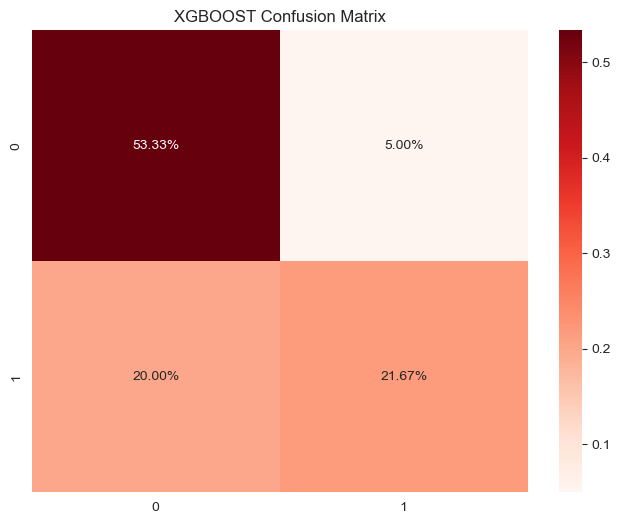

AUC-ROC: 0.8582857142857143


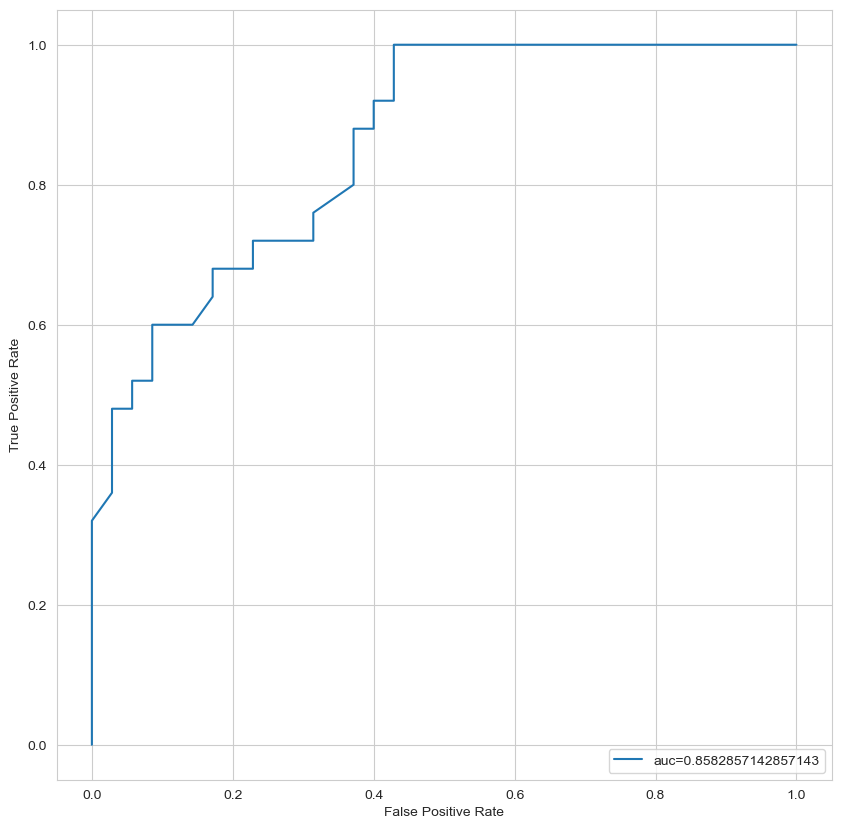


The average cross-validation score is 0.8190909090909091


In [ ]:
#model tuning
param_grid = [
  {'n_estimators': [10,25,50,75,100],'max_depth': [2,4,6,8,10,12]}
    ]
model_xgb = XGBClassifier()
model_gs = GridSearchCV(model_xgb,param_grid,cv=10,n_jobs=-1)
model_gs.fit(X_train,y_train)
print("The best estimator is : ",model_gs.best_estimator_)

#Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_cv))
xg= round(accuracy_score(y_test, pred_cv)*100,2)
xg_1= round(recall_score(y_test, pred_cv)*100,2)
print("\nXGBoost Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))

#Confusion Matrix
cm1 = confusion_matrix(y_test, pred_cv)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("XGBOOST Confusion Matrix",fontsize=12)
plt.show()
plt.show()

#ROC curve
probs = model_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc}")
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

In [ ]:
 # tune hyperparameters for Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model_lr = LogisticRegression()
model_gs = GridSearchCV(model_lr, param_grid, cv=10, n_jobs=-1, error_score='raise')
model_gs.fit(X_train, y_train)
best_params = model_gs.best_params_
print("Best hyperparameters:", best_params)

# # evaluate Logistic Regression with best hyperparameters
# pred_cv = model_gs.best_estimator_.predict(X_test)
# print ("\nAccuracy with best estimator : ",accuracy_score(y_test, pred_cv))
# lr = round(accuracy_score(y_test, pred_cv)*100,2)
# lr_1= round(recall_score(y_test, pred_cv)*100,2)
# print("\nLogistic Regression Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))

# # plot confusion matrix
# cm1 = confusion_matrix(y_test, pred_cv)
# sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
# plt.title("LOGISTIC REGRESSION Confusion Matrix", fontsize=12)
# plt.show()

# # plot ROC curve
# probs = model_gs.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = roc_curve(y_test, preds)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(10,10))
# plt.plot(fpr, tpr, label="auc="+str(roc_auc))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc=4)
# plt.show()

# # cross validation score
# cv_scores = cross_val_score(model_gs.best_estimator_, X, y, cv=25, n_jobs=-1)
# print("\nThe average cross-validation score is %s"%cv_scores.mean())



best_log_reg = LogisticRegression(**best_params, class_weight='balanced')
best_log_reg.fit(X_train,y_train)
best_y_pred = best_log_reg.predict(X_test)

Log_hyp_accuracy = accuracy_score(y_test, best_y_pred)
Log_hyp_auc = roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:, 1])
print("Accuracy:", Log_hyp_accuracy)
print("AUC:", Log_hyp_auc)


Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7666666666666667
AUC: 0.8331428571428572


The best estimator is :  DecisionTreeClassifier(max_depth=2, min_samples_leaf=12)

Accuracy with best estimator :  0.7

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.80      0.76        35
           1       0.67      0.56      0.61        25

    accuracy                           0.70        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.70      0.70      0.70        60



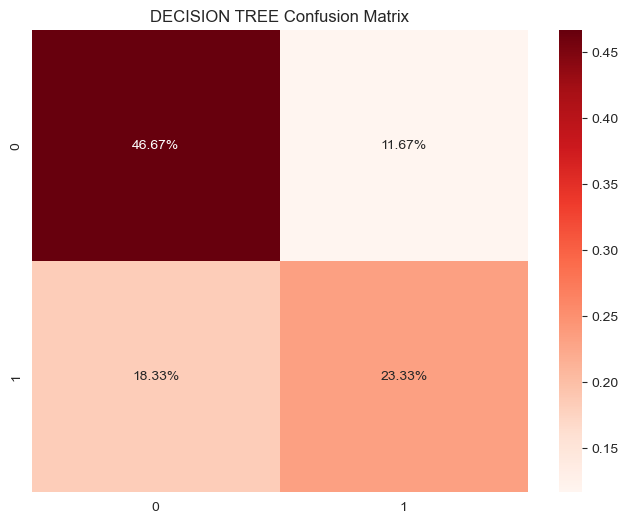

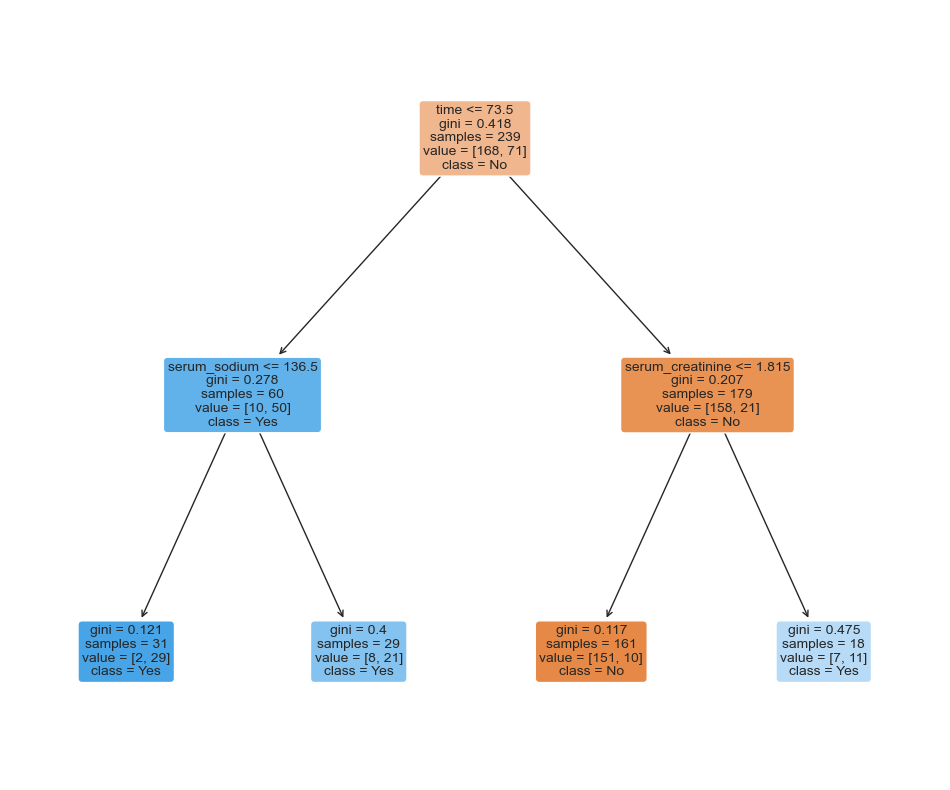

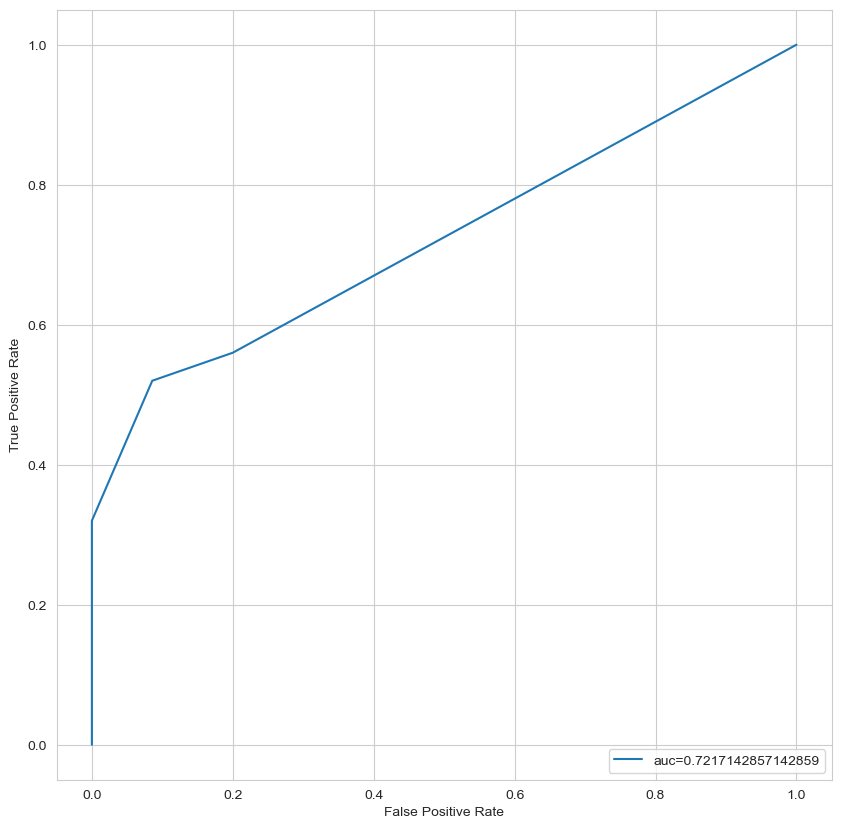


The average cross-validation score is 0.8357575757575756


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
param_grid = [
  {'max_depth': [2, 4, 6, 8, 10, 12], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12]}
]
model_dt = DecisionTreeClassifier()
model_gs = GridSearchCV(model_dt, param_grid, cv=10, n_jobs=-1)
model_gs.fit(X_train, y_train)
print("The best estimator is : ",model_gs.best_estimator_)

# Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print("\nAccuracy with best estimator : ", accuracy_score(y_test, pred_cv))
dt = round(accuracy_score(y_test, pred_cv)*100, 2)
dt_1 = round(recall_score(y_test, pred_cv)*100, 2)
print("\nDecision Tree Classification Report: \n", classification_report(y_test, pred_cv, target_names=None))

# Confusion Matrix
cm1 = confusion_matrix(y_test, pred_cv)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("DECISION TREE Confusion Matrix", fontsize=12)
plt.show()

# Plotting the Decision Tree
plt.figure(figsize=(12, 10))
plot_tree(model_gs.best_estimator_, feature_names=X.columns, filled=True, fontsize=10, rounded=True, class_names=['No', 'Yes'])
plt.show()

# ROC Curve
probs = model_gs.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_, X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s" % cv_scores.mean())


#ELI5

In [ ]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


#Logistic Regression




In [ ]:
class_names=[1,0]

In [ ]:
import eli5
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Visualize the weights associated with each feature
eli5.show_weights(lr,feature_names=X_train.columns.tolist(),target_names=class_names)


In [ ]:
# Pick a row with negative label
row_neg = X_test[y_test == 0].iloc[0]
print("Negative row:", row_neg)
prediction_neg = lr.predict_proba(row_neg.values.reshape(1, -1))[0, 1]
print("Predicted probability of positive class for negative row:", prediction_neg)
eli5.show_prediction(lr, row_neg, feature_names= list(X_test.columns),target_names=class_names)

Negative row: age                            70.0
anaemia                         0.0
creatinine_phosphokinase      582.0
diabetes                        0.0
ejection_fraction              40.0
high_blood_pressure             0.0
platelets                   51000.0
serum_creatinine                2.7
serum_sodium                  136.0
sex                             1.0
smoking                         1.0
time                          250.0
Name: 281, dtype: float64
Predicted probability of positive class for negative row: 0.03849108343803225


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Pick a row with positive label
row_pos = X_test[y_test == 1].iloc[0]
print("Positive row:", row_pos)
prediction_pos = lr.predict_proba(row_pos.values.reshape(1, -1))[0, 1]
print("Predicted probability of positive class for positive row:", prediction_pos)
eli5.show_prediction(lr, row_pos, feature_names = list(X_test.columns),target_names=class_names)


Positive row: age                             45.0
anaemia                          0.0
creatinine_phosphokinase      2442.0
diabetes                         1.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   334000.0
serum_creatinine                 1.1
serum_sodium                   139.0
sex                              1.0
smoking                          0.0
time                           129.0
Name: 164, dtype: float64
Predicted probability of positive class for positive row: 0.15093695901316956


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#Decision Tree

In [ ]:
from eli5.sklearn import PermutationImportance

# compute feature importances
perm = PermutationImportance(dt).fit(X_test, y_test)

# display feature importances in descending order
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


In [ ]:
#feature importance ordered by highest value
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
feature_names = list(X_train.columns)
eli5.show_weights(dt, feature_names=feature_names)

In [ ]:
# explain a positive prediction for the first data point
explanation_pos = eli5.explain_prediction(dt, X.iloc[0], feature_names=list(X.columns))
print(explanation_pos)


Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected s

In [ ]:
# explain a negative prediction for the second data point
explanation_neg = eli5.explain_prediction(dt, X.iloc[1], feature_names= list(X.columns))
print(explanation_neg)


Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected s

In [ ]:
eli5.explain_prediction(dt, X_test[y_test == 1].iloc[0], feature_names=list(X_test.columns))


Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.702928870292887, std=None, value=1.0), FeatureWeight(feature='time', weight=0.17975269395292304, std=None, value=129.0), FeatureWeight(feature='serum_creatinine', weight=0.12822894688517916, std=None, value=1.1), FeatureWeight(feature='platelets', weight=0.01147888984983092, std=None, value=334000.0)], neg=[FeatureWeight(feature='ejection_fraction', weight=-0.022389400980820096, std=None, value=30.0)], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
eli5.explain_prediction(dt, X_test[y_test == 0].iloc[0], feature_names=list(X_test.columns))


Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='serum_creatinine', weight=0.49379267535692123, std=None, value=2.7), FeatureWeight(feature='<BIAS>', weight=0.29707112970711297, std=None, value=1.0), FeatureWeight(feature='platelets', weight=0.17575757575757578, std=None, value=51000.0), FeatureWeight(feature='creatinine_phosphokinase', weight=0.12222222222222212, std=None, value=582.0), FeatureWeight(feature='serum_sodium', weight=0.09090909090909094, std=None, value=136.0)], neg=[FeatureWeight(feature='time', weight=-0.17975269395292304, std=None, value=250.0)], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

#Using Lime

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=e4a14756b933d35d0da5d68e6d2b298796fcbd882c2d92ecfe3cd11551a22087
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# train a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[1,0],
    mode='classification')

#train an xgb model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[1,0],
    mode='classification')

In [ ]:
rf_exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=rf.predict_proba
)

rf_exp.show_in_notebook(show_table=True)
print('Random Forest explanation:')
print(rf_exp.as_list())
print(f"Intercept: {rf_exp.intercept[rf_exp.available_labels()[0]]:.4f}")
print(f"R2 score: {rf_exp.score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest explanation:
[('time > 205.50', -0.16131091401667857), ('serum_creatinine <= 0.90', -0.0943582704574816), ('30.00 < ejection_fraction <= 38.00', -0.06062931162426367), ('age <= 52.00', -0.059772389465598194), ('245.00 < creatinine_phosphokinase <= 582.00', 0.030378248597145205), ('0.00 < sex <= 1.00', -0.029915766736115075), ('serum_sodium > 139.00', -0.021234669259556766), ('diabetes <= 0.00', -0.01310673960089813), ('high_blood_pressure <= 0.00', -0.009326963625154118), ('platelets > 303500.00', -0.007161414480074486)]
Intercept: 0.4780
R2 score: 0.1323


In [ ]:
rf_exp = explainer.explain_instance(
    data_row=X_test.iloc[15],
    predict_fn=rf.predict_proba
)

rf_exp.show_in_notebook(show_table=True)
print('Random Forest explanation:')
print(rf_exp.as_list())
print(f"Intercept: {rf_exp.intercept[rf_exp.available_labels()[0]]:.4f}")
print(f"R2 score: {rf_exp.score:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest explanation:
[('time <= 73.50', 0.4419430351571135), ('ejection_fraction <= 30.00', 0.13379101589304396), ('0.90 < serum_creatinine <= 1.10', -0.0717499218605974), ('age <= 52.00', -0.055243560469542305), ('137.00 < serum_sodium <= 139.00', -0.027640191973571742), ('0.00 < high_blood_pressure <= 1.00', 0.017886016675218747), ('creatinine_phosphokinase > 582.00', 0.012923108523218322), ('anaemia <= 0.00', -0.012151816137848017), ('0.00 < sex <= 1.00', -0.009941709025942), ('smoking <= 0.00', -0.0016421551669188082)]
Intercept: 0.2390
R2 score: 0.6558


In [ ]:
xgb_exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=xgb.predict_proba
)

xgb_exp.show_in_notebook(show_table=True)
print('XGBoost explanation:')
print(xgb_exp.as_list())
print(f"Intercept: {xgb_exp.intercept[xgb_exp.available_labels()[0]]:.4f}")
print(f"R2 score: {xgb_exp.score:.4f}")


XGBoost explanation:
[('time > 205.50', -0.3087427127982897), ('serum_creatinine <= 0.90', -0.10528201885599418), ('age <= 52.00', -0.08435852124599116), ('245.00 < creatinine_phosphokinase <= 582.00', 0.050739884741809925), ('30.00 < ejection_fraction <= 38.00', -0.04465282811366633), ('0.00 < sex <= 1.00', -0.042344796210406585), ('0.00 < smoking <= 1.00', 0.026985456862109822), ('serum_sodium > 139.00', -0.019164257273034994), ('0.00 < anaemia <= 1.00', 0.016186611386730356), ('diabetes <= 0.00', 0.015592912637835356)]
Intercept: 0.4601
R2 score: 0.1580


In [ ]:
xgb_exp = explainer.explain_instance(
    data_row=X_test.iloc[15],
    predict_fn=rf.predict_proba
)

xgb_exp.show_in_notebook(show_table=True)
print('XGBoost explanation:')
print(xgb_exp.as_list())
print(f"Intercept: {xgb_exp.intercept[xgb_exp.available_labels()[0]]:.4f}")
print(f"R2 score: {xgb_exp.score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


XGBoost explanation:
[('time <= 73.50', 0.44016332176875844), ('ejection_fraction <= 30.00', 0.1444228029303278), ('0.90 < serum_creatinine <= 1.10', -0.0738990477465146), ('age <= 52.00', -0.04115273625225118), ('0.00 < high_blood_pressure <= 1.00', 0.01573345701231028), ('137.00 < serum_sodium <= 139.00', -0.012966109269017131), ('creatinine_phosphokinase > 582.00', 0.010826412663444286), ('platelets > 303500.00', -0.008136629722468624), ('0.00 < sex <= 1.00', -0.007302933425090923), ('0.00 < diabetes <= 1.00', 0.00640435834436572)]
Intercept: 0.2186
R2 score: 0.6486


#Using SHAP

In [ ]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.9 MB/s eta 0:00:00


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


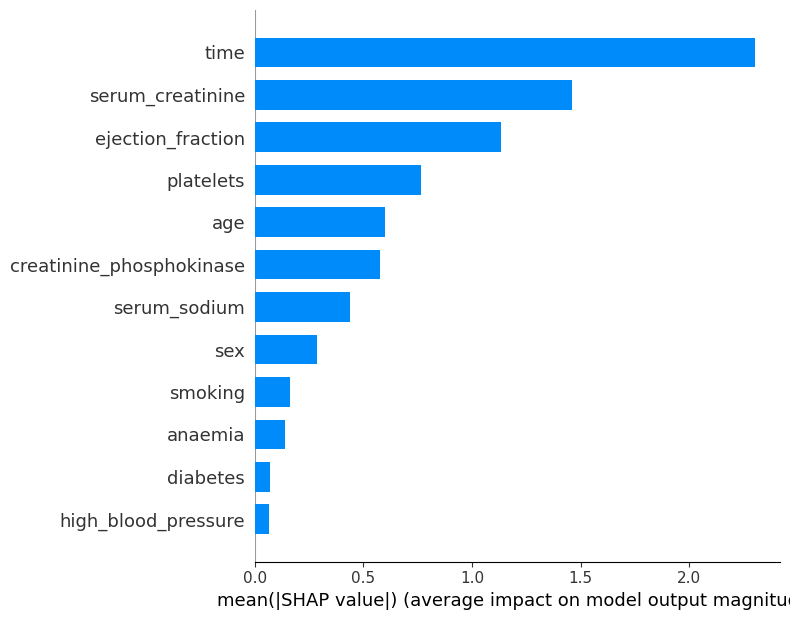

In [ ]:
import shap

# create a TreeExplainer object for our XGBoost model
xgb_explainer = shap.TreeExplainer(xgb)

# calculate SHAP values for a subset of the data
sample = X_test.sample(n=20)
sample = sample.reset_index(drop=True)
shap_values = xgb_explainer.shap_values(sample)

# plot feature importance using summary_plot
shap.summary_plot(shap_values, sample, plot_type='bar', class_names=xgb.classes_)


In [ ]:
# visualize explanations for a positive prediction using force_plot
shap.initjs()
index = sample.index[0]
shap.force_plot(xgb_explainer.expected_value, shap_values[index,:], sample.iloc[index,:])

The resulting visualization shows the contribution of each feature to the predicted probability of the positive class for the selected instance. The horizontal line represents the expected value of the model's predictions, and the blue and red bars represent the positive and negative contributions of each feature to the final prediction, respectively.

In [ ]:
# visualize explanations for a negative prediction using force_plot
shap.initjs()
index = sample.index[1]
shap.force_plot(xgb_explainer.expected_value, shap_values[index,:], sample.iloc[index,:])


The resulting visualization shows the contribution of each feature to the predicted probability of the negative class for the selected instance. The horizontal line represents the expected value of the model's predictions, and the blue and red bars represent the positive and negative contributions of each feature to the final prediction, respectively.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [ ]:
def preprocess_data(X, scaler, feature_names=None):
    X_scaled = scaler.transform(X)
    if feature_names is not None:
        X_scaled = pd.DataFrame(X_scaled, columns=feature_names)
    return X_scaled


In [ ]:
#positive labels
# preprocess the data
X_pred = preprocess_data(X_test, scaler, feature_names=X_test.columns)


# predict using logistic regression
lr_prob = lr.predict_proba(X_pred)
print(f"LR: [{lr_prob[0][1]:.4f}, {lr_prob[1][1]:.4f}]")
lr_acc = lr.score(X_pred, y_test)

# predict using decision tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_pred)
dt_acc = np.mean(dt_pred == y_test)
print(f"DT: [{1-dt_acc:.4f}, {dt_acc:.4f}]")

# predict using random forest
rf_prob = rf.predict_proba(X_pred)
rf_acc = rf.score(X_pred, y_test)
print(f"RF: [{rf_prob[0][1]:.4f}, {rf_prob[1][1]:.4f}]")

# predict using xgboost
xgb_prob = xgb.predict_proba(X_pred)
xgb_acc = xgb.score(X_pred, y_test)
print(f"XGB: [{xgb_prob[0][1]:.4f}, {xgb_prob[1][1]:.4f}]")


LR: [0.5030, 0.4834]
DT: [0.6000, 0.4000]
RF: [0.8000, 0.7300]
XGB: [0.9796, 0.9614]
